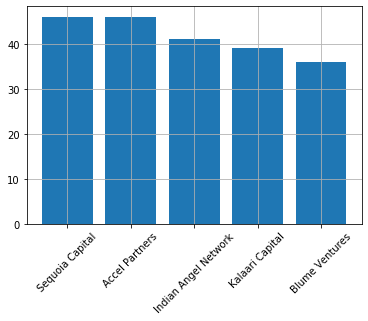

In [3]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Investors and its funded startups names
investors = {}

def startup_investors(startup_investor):
    startup_investor = str(startup_investor)
    startupname = startup_investor.split('###')[0].strip().title()
    investornames = startup_investor.split('###')[1]
    investornames = investornames.split(',')
    for name in investornames:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startupname])
            else:
                if startupname not in investors[name]:
                    investors[name].add(startupname)
    return startup_investor
            
    
# Update Startup Names
def updateStartupName(name):
    oyonames = {'Oyo Rooms','OYO Rooms','OyoRooms','Oyorooms','Oyo'}
    olanames = {'Olacabs','Ola','Ola Cabs'}
    flipkartnames = {'Flipkart.com','Flipkart'}
    paytmnames = {'Paytm','Paytm Marketplace'}
    if name in oyonames:
        return 'Oyo'
    if name in olanames:
        return 'Ola'
    if name in flipkartnames:
        return 'Flipkart'
    if name in paytmnames:
        return 'Paytm'
    return name


# Load Data
df_startups = pd.read_csv('startup_funding.csv')

# Drop all null value rows for StartupName and InvestorsName
# Note : dropna function was not working hence I had to do it other
# way around.
df_startups = df_startups[pd.notna(df_startups['StartupName'])]
df_startups = df_startups[pd.notna(df_startups['InvestorsName'])]
df_startups['StartupName'] = df_startups['StartupName'].apply(updateStartupName)

# Combined Investors Names and Startup Name to get the Investors Dictionary gets filled properly
df_startups['startup_investor'] = df_startups['StartupName'] + '###' + df_startups['InvestorsName']
df_startups['startup_investor'] = df_startups['startup_investor'].apply(startup_investors)

investor_counts = [[len(value),key]for key, value in investors.items()]
investor_counts.sort(reverse=True)
investor = [ i[1] for i in investor_counts[1:6]]
counts = [ i[0] for i in investor_counts[1:6]]

plt.bar(investor,counts)
plt.xticks(rotation=45)
plt.grid()
plt.show()
